## **Random Walk**
### **1. Gaussian Random Walk**

$X_t = X_{t-1} + \epsilon_t$
$$\epsilon_t \sim N(0, \sigma^2)$$

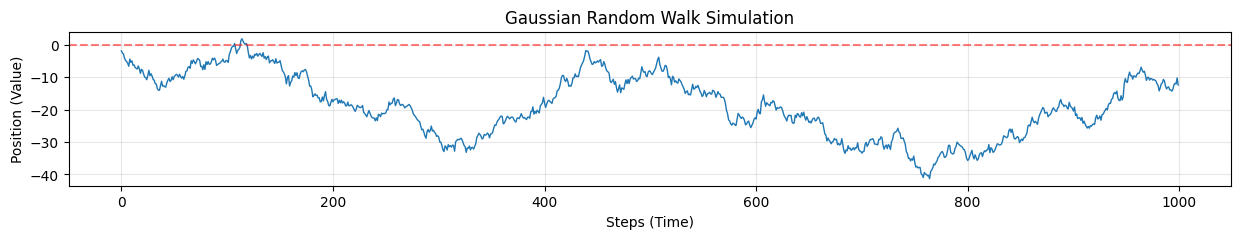

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 환경 설정
n_steps = 1000  # 총 발걸음 수 (주식 : 시간)
mu = 0          # 평균 (어느 한쪽으로 쏠리지 않음)
sigma = 1       # 변동성 (발걸음의 평균적인 크기)

# 2. 가우스 분포(정규분포)에서 랜덤한 발걸음들 생성
# 평균 0, 표준편차 1인 종 모양 곡선에서 숫자 1000개를 뽑습니다.
steps = np.random.normal(mu, sigma, n_steps)

# 3. 무작위 행보 생성 (발걸음들을 계속 더해 나감)
# 위치 = 이전 위치 + 현재 발걸음
path = np.cumsum(steps)

# 4. 시각화
plt.figure(figsize=(15, 2))
plt.plot(path, color='#1f77b4', linewidth=1)
plt.axhline(0, color='red', linestyle='--', alpha=0.5) # 시작 기준선
plt.title("Gaussian Random Walk Simulation")
plt.xlabel("Steps (Time)")
plt.ylabel("Position (Value)")
plt.grid(True, alpha=0.3)
plt.show()

In [2]:
print(f'path의 평균 :{np.mean(path)}. 표준편차 {np.std(path)}')

path의 평균 :-18.753989353879106. 표준편차 9.62301566131364


- 변동성 ($\sigma$): 코드의 sigma 값을 높이면 그래프가 훨씬 더 위아래로 크게 요동칩니다. 이것이 공식에 포함된 변동성($\sigma$)의 정체입니다.
- 확률 ($P_m$): 만약 이 시뮬레이션을 10,000번 반복한다면, 마지막 도착점들이 특정 범위(예: 행사가 $K$ 위)에 있을 확률을 계산할 수 있습니다. 이것이 이미지에서 설명하는 **How likely you will exercise?** 의 수학적 근거가 됩니다.
- 시간 ($T$): n_steps가 커질수록(시간이 흐를수록) 무작위 행보가 시작점(0)에서 멀리 퍼져나갈 확률이 높아집니다. 공식에서 $T$가 곱해지는 이유입니다.

- 이 무작위 행보를 여러 개 겹쳐서 그려보면(앙상블), 주가가 만기에 가질 수 있는 '확률 분포'가 눈에 보이게 됩니다. 여러 개의 경로를 동시에 그리는 코드도 확인해 보시겠어요?

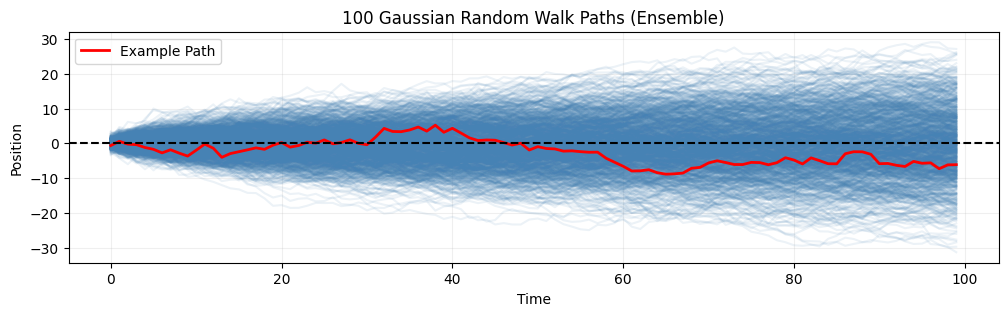

In [3]:
# 설정
n_paths = 1000   # 시뮬레이션할 경로의 수 (예: 100개의 평행 우주)
n_steps = 100  # 시간 흐름
sigma = 1       # 변동성

# 1. 100개의 경로에 대한 랜덤 발걸음을 한 번에 생성 (행: 시간, 열: 경로)
steps = np.random.normal(0, sigma, (n_steps, n_paths))

# 2. 각 경로별로 누적 합계 계산
paths = np.cumsum(steps, axis=0)

# 3. 시각화
plt.figure(figsize=(12, 3))

# 모든 경로 그리기 (연하게 표시하여 겹치는 부분의 밀도를 확인)
plt.plot(paths, color='steelblue', alpha=0.1)

# 그중 하나의 경로만 강조 (예: 우리가 관찰하는 실제 주가)
plt.plot(paths[:, 0], color='red', linewidth=2, label='Example Path')

plt.axhline(0, color='black', linestyle='--')
plt.title(f"100 Gaussian Random Walk Paths (Ensemble)")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

In [4]:
paths.shape

(100, 1000)

In [5]:
# 1000가지 경우에 100시간 동안 발생하는 path
print(np.mean(paths, 0).shape)  # 각각의 평균
print(np.std(paths, 0).shape) # 각각의 표준편차

(1000,)
(1000,)


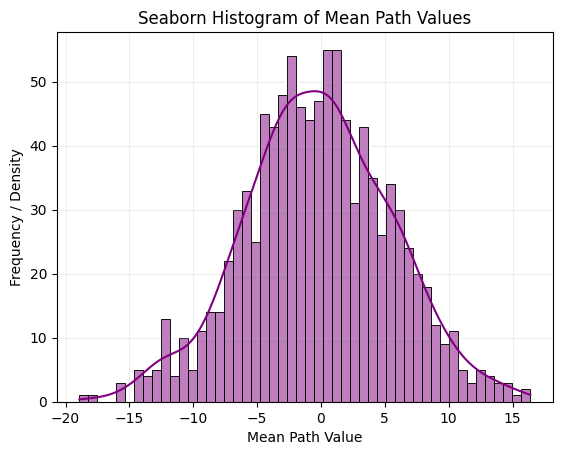

In [6]:
import seaborn as sns
sns.histplot(np.mean(paths, axis=0), bins=50, kde=True, color='purple')
plt.title('Seaborn Histogram of Mean Path Values')
plt.xlabel('Mean Path Value')
plt.ylabel('Frequency / Density')
plt.grid(True, alpha=0.2)
plt.show()

### **금융공학적 해석**

- ① 확산(Diffusion): "시간이 흐를수록 미래는 불투명해진다"그래프를 보면 시간이 지날수록 경로들이 부채꼴 모양으로 점점 넓게 퍼집니다.이는 옵션 공식에서 시간($T$)이 길수록 옵션 가격이 비싸지는 이유를 설명합니다. 시간이 많을수록 주가가 대박(혹은 쪽박)이 날 확률적 범위가 넓어지기 때문입니다.

- ② 밀도(Density)와 정규분포중앙(0 근처)에는 경로들이 빽빽하게 모여 있고, 위아래 끝으로 갈수록 경로가 드문드문해집니다.마지막 시점(Time=1000)에서 이 점들을 세로로 세워 빈도수를 체크하면, 처음에 보셨던 이미지 속의 **종 모양(Gaussian Bell Curve)** 이 나타납니다.

- ③ 옵션 행사 확률 ($P_m$) **$175$ 행사가($K$)** 를 이 그래프에 가로선으로 긋는다고 상상해 보세요.100개의 경로 중 그 가로선보다 위에 있는 경로의 개수가 바로 **"옵션이 수익을 낼 확률($P_m$)"** 이 됩니다. 블랙-숄즈 공식의 $N(d_2)$가 바로 이 비율을 계산하는 수학적 도구입니다.

### **2. Geometric Random Walk**

실제 주식은 0 아래로 내려가지 않고, 퍼센트(%) 수익률로 움직입니다. 그래서 금융 공학에서는 위 코드의 결과물에 **지수 함수(exp)** 를 취한 기하 브라운 운동을 사용합니다.

혹시 이 무작위 행보에 **'우상향하는 성질(Drift)'** 을 추가하거나, 실제 **'주가 차트'**처럼 보이게 변형하는 방법

실제 주가는 단순히 위아래로 움직이는 것이 아니라, 시간이 지남에 따라 **기대 수익률(이자율 등)**에 의해 일정한 방향성을 갖는 경향이 있습니다. 이를 금융 공학에서는 **표류(Drift)**라고 부릅니다.

가우스 무작위 행보에 이 '표류'를 더하고, 주가가 0 아래로 내려가지 않도록 변형하면 우리가 보는 실제 테슬라 주가 차트와 같은 **기하 브라운 운동(Geometric Brownian Motion, GBM)**이 됩니다.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 설정
s0 = 180        # 시작 주가 (테슬라 예시)
r = 0.05        # 연이율 (Drift, 5%)
sigma = 0.3     # 변동성 (30%)
T = 1.0         # 기간 (1년)
n_steps = 252   # 영업일 기준 252단계
dt = T / n_steps
n_paths = 100    # 시뮬레이션 경로 수

# 1. 표준 정규분포에서 무작위 행보 생성 (dW)
# 표준 정규분포(표준편차 1)를 시간 단위에 맞게 스케일링
dw = np.random.normal(0, np.sqrt(dt), (n_steps, n_paths))
print(dw.shape)   # 1/252를 T-252 횟수만큼 표준편차를 시뮬레이션

(252, 100)


In [43]:
# 2. 기하 브라운 운동(GBM) 공식 적용
# 주가 공식: St = S0 * exp((r - 0.5*sigma**2)*t + sigma*Wt)
time_axis = np.linspace(0, T, n_steps)  # 0부터 251 총 252회
drift = (r - 0.5 * sigma**2) * dt
diffusion = sigma * dw

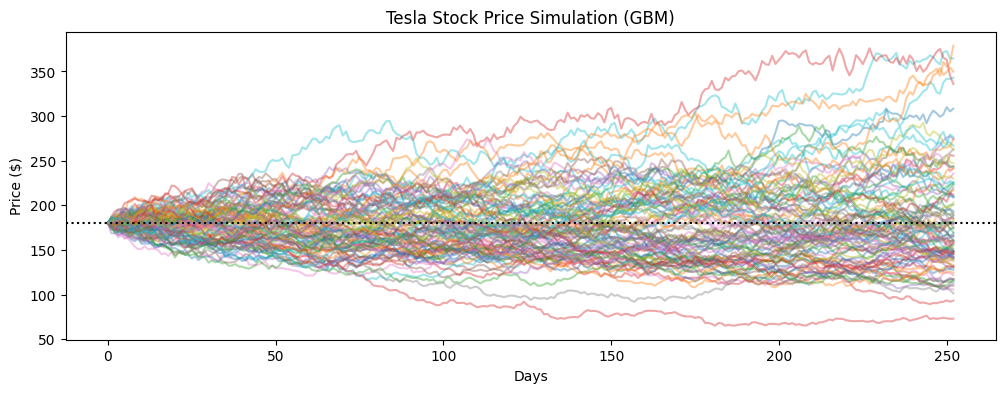

In [44]:
# 로그 수익률의 누적 합산
log_returns = drift + diffusion
cumulative_log_returns = np.cumsum(log_returns, axis=0)

# 시작가(S0)를 곱하고 지수함수(exp)를 취함
paths = s0 * np.exp(cumulative_log_returns)
# 시작 시점 추가
paths = np.insert(paths, 0, s0, axis=0)

# 3. 시각화
plt.figure(figsize=(12, 4))
plt.plot(paths, alpha=0.4)
plt.axhline(s0, color='black', linestyle=':', label='Start Price')
plt.title(f"Tesla Stock Price Simulation (GBM)")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.show()